### Деревья решений. Недо- и переобучение.

### Загрузим данные

In [1]:
import numpy as np
data = np.load('data.npz')
X,y = data["X"],data["y"]


In [2]:
print X.shape, y.shape

(4505, 2) (4505,)


### Train vs Test

In [3]:
from sklearn.cross_validation import train_test_split
np.random.seed(1337)
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.5)

### Графички

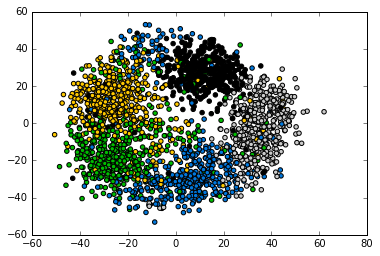

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap='spectral')

# Здравствуй, дерево

У дерева классификации (DecisionTreeClassifier) есть несколько параметров:
* criterion : как выбирать лучший признак - 'gini' или 'entropy' (по умолчанию gini).
* max_depth :  максимальная глубина дерева (по умолчанию - не ограничено)
* min_samples_split : минимальное количество примеров, которые можно делить дальше (по умолчанию 2)
* min_samples_leaf : минимальное количество примеров в листе (по умолчанию 1).

Сейчас все параметры установлены по умолчанию, но скоро это изменится

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Нарисуем цветом то, что мы выучили
* Дальше следует большая-толстая функция, которая по сути вызывает дерево решений в каждой точке и рисует это на графике. Она сильно оптимизирована, поэтому трудночитаема - пока в неё можно просто поверить.

In [8]:
from sklearn.metrics import accuracy_score
def plot_decision_surface(clf,X,y,
                          plot_step = 0.2,
                          cmap='spectral',
                          figsize=(12,8)
                         ):
    # Plot the decision boundary
    
    plt.figure(figsize=figsize)
    
    n_classes = len(set(y))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap,alpha=0.5)    
    y_pred = clf.predict(X)

    # Plot the training points
    plt.scatter(*X[y_pred==y].T,c = y[y_pred==y],
                marker='.',cmap=cmap,alpha=0.5,label='correct')
    plt.scatter(*X[y_pred!=y].T,c = y[y_pred!=y],
                marker='x',cmap=cmap,s=50,label='errors')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis("tight")
    plt.legend(loc='best')
    print "Accuracy = ",accuracy_score(y,y_pred)


### Качество на обучающей выборке

Accuracy =  1.0


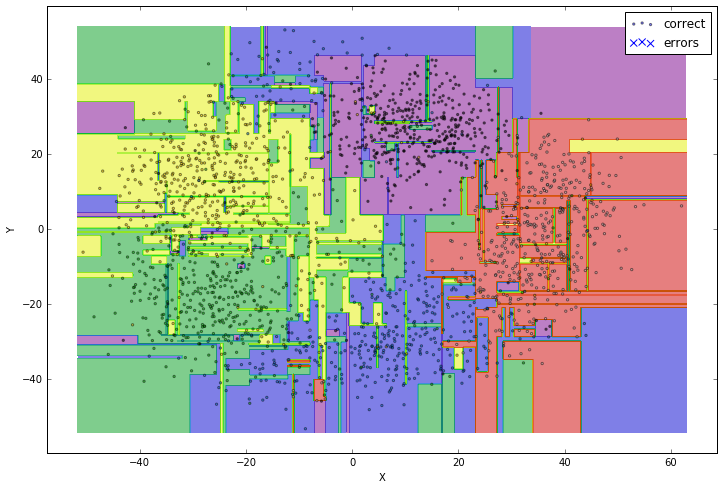

In [10]:
plot_decision_surface(tree,X_train,Y_train)

### Качество на тесте

Accuracy =  1.0


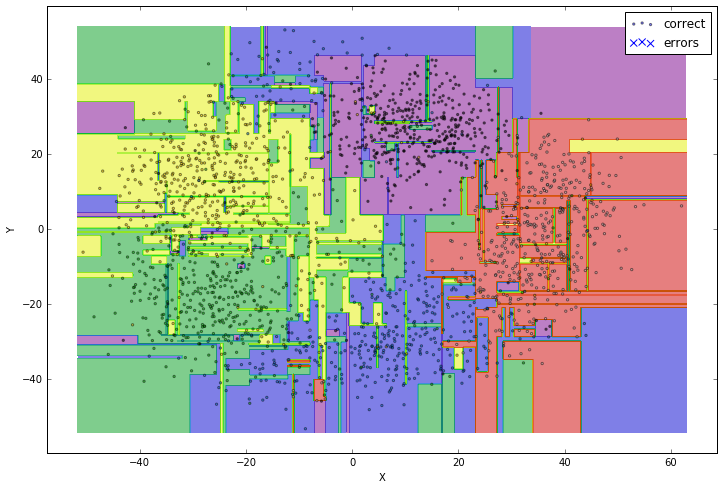

In [11]:
plot_decision_surface(tree, X_train,Y_train)

### Чини его полностью!

Попробуйте поменять параметры DecisionTreeClassifier, чтобы точность стала лучше.
 * Accuracy >= 0.72 - неплохой первый шаг
 * Accuracy >= 0.75 - уже лучше, но можно ещё поднажать
 * Accuracy >= 0.78 - вполне неплохо
 * Accuracy >= 0.8  - или офигенно или очень повезло
 
[чтобы не мучиться, можно не переписывать всё, а исправлять код выше]

### Ансамбли

После этого можно попробовать Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

### Grid search

__Бонусный квест -__ найти оптимальные параметры классификатора поиском по сетке.
Можно написать скрипт, который будет самостоятельно перебирать наборы параметров и выбирать те, у которых в итоге лучше точность.

In [ ]:
<your code here>

final_model = <your_code>

In [ ]:
plot_decision_surface(final_model,Xts,Yts)

### Всё ещё переобучаемся

Дерево классификации строится так, чтобы лучше __подогнаться__ под __обучающую выборку__.
Сейчас __вы подгоняете__ параметры модели так, чтобы качество на __тестовой выборке__ было наибольшим.
По сути, вы больше не можете считать, что качество на тесте - хорошая оценка реального качества, потому, что вы подгоняетесь под эту выборку.

Как с этим бороться?
```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

Например, можно выделить ещё одну "совсем тестовую" выборку, положить её под камень и не использовать при выборе гиперпараметров -- и оцениваться на ней только 1 раз, когда вы уже определились с моделью.